In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
torch.__version__
torch.cuda.is_available()

False

In [ ]:
from google.colab import files
with open ('example.txt','w') as f:
  f.write('hello google colab')

In [ ]:
!cat /etc/issue.net

Ubuntu 22.04.3 LTS


In [ ]:
# TensorFlow 업데이트
!pip install --upgrade tensorflow

# Keras 업데이트 (TensorFlow 2.x에 포함되어 있으므로 TensorFlow를 업데이트하면 Keras도 함께 업데이트됩니다)
!pip install --upgrade keras

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   35G   73G  33% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  5.0M  6.4G   1% /var/colab
/dev/sda1        50G   39G   12G  77% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
# train_data = train_datagen.flow_from_directory("data/train", target_size=(224, 224), batch_size=32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# CNN 회귀 모델
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), # 이미지 입력 예시
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),  # FC Layer
    Dense(1, activation='linear')  # 회귀 문제: 1개의 연속값 출력
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ---------------- 데이터 생성 ----------------
# 난수 생성을 위한 시드 설정 (재현 가능한 결과)
np.random.seed(42)

# 샘플 데이터 개수 설정
num_samples = 100000

# Cobb각은 양 끝의 각도의 절댓값의합
#Cobb Angle=|a-b|
# a:위쪽 끝plate의 기울기 각도
# b: 아래쪽 끝plate의 기울기 각도

# Cobb 각도 데이터를 0~40도 사이의 값으로 무작위 생성
cobb_angles = np.random.uniform(0, 40, size=(num_samples, 1))

# 레이블(0, 1, 2, 3 중 하나)을 무작위로 생성
labels = np.random.randint(0, 4, size=(num_samples,))

# Cobb 각도와 레이블을 하나의 DataFrame으로 결합
data = pd.DataFrame({'COB 각도 (도)': cobb_angles.flatten(), '레이블': labels})

# 입력 변수(X)와 레이블(y) 분리
X = data[['COB 각도 (도)']].values  # X: 입력값 (Cobb 각도)
y = data['레이블'].values  # y: 정답 레이블

# 입력 데이터를 표준화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 데이터와 테스트 데이터로 나누기 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# CNN 입력에 맞게 데이터를 3차원 형태로 변환 (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))



# # ---------------- 예측 예시 ----------------
# # 새로운 입력값(Cobb 각도) 예시: 25도
# sample_input = np.array([[25.0]])

# # 입력값을 학습 시 사용된 스케일러를 사용해 정규화하고 3차원으로 변환
# sample_input_scaled = scaler.transform(sample_input).reshape((1, 1, 1))

# # 모델을 사용해 예측 수행
# prediction = model.predict(sample_input_scaled)

# # 예측 결과 출력 (확률 값과 가장 높은 확률을 가진 클래스)
# print(f"예측 결과 (확률): {prediction}")
# print(f"예측 클래스: {np.argmax(prediction)}")



In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D


model = Sequential()
model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(10, 32)))  # steps=10, features=32
model.add(Conv1D(64, kernel_size=2, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (80000, 1, 1)
X_test shape: (20000, 1, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense

# Eager Execution 활성화 (TensorFlow 2.x에서는 기본적으로 활성화됨)
tf.config.run_functions_eagerly(True)

# 예시 데이터 생성 (여기서는 임의의 데이터로 대체)
X_train = np.random.rand(100, 10, 1)  # (100, 10, 1)
y_train = np.random.randint(0, 4, size=(100,))  # 4개의 클래스

# Sequential 모델 초기화
model = Sequential()

# 첫 번째 1D 컨볼루션 레이어 (32개의 필터, 커널 크기 2)
model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))

# 과적합 방지를 위한 드롭아웃 레이어 (20% 드롭아웃)
model.add(Dropout(0.2))

# 두 번째 1D 컨볼루션 레이어 (64개의 필터, 커널 크기 2)
model.add(Conv1D(64, kernel_size=2, activation='relu'))

# 과적합 방지를 위한 드롭아웃 레이어 (20% 드롭아웃)
model.add(Dropout(0.2))

# 데이터를 1차원으로 펼치는 레이어
model.add(Flatten())

# 완전 연결(Dense) 레이어 (은닉층: 64개의 뉴런)
model.add(Dense(64, activation='relu'))

# 출력 레이어 (4개의 클래스에 대한 softmax 활성화 함수 사용)
model.add(Dense(4, activation='softmax'))

# 모델 컴파일 (옵티마이저: Adam, 손실 함수: sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 시작
print("모델 학습 시작...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 테스트 데이터를 사용해 모델 성능 평가
X_test = np.random.rand(20, 10, 1)  # (20, 10, 1)
y_test = np.random.randint(0, 4, size=(20,))  # 4개의 클래스

loss, accuracy = model.evaluate(X_test, y_test)
print(f'테스트 손실: {loss:.4f}, 테스트 정확도: {accuracy:.4f}')


모델 학습 시작...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.3297 - loss: 1.3802 - val_accuracy: 0.1500 - val_loss: 1.3852
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.2586 - loss: 1.3749 - val_accuracy: 0.3000 - val_loss: 1.3821
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3391 - loss: 1.3772 - val_accuracy: 0.4000 - val_loss: 1.3801
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3305 - loss: 1.3633 - val_accuracy: 0.4000 - val_loss: 1.3782
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.3672 - loss: 1.3608 - val_accuracy: 0.3500 - val_loss: 1.3781
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3805 - loss: 1.3525 - val_accuracy: 0.3500 - val_loss: 1.3777
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.3102 - loss: 1.3647 - val_accuracy: 0.3500 - val_loss: 1.3766
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.3344 - loss: 1.3704 - val_accuracy: 0.3500 - val_loss: 1.3757
Epo

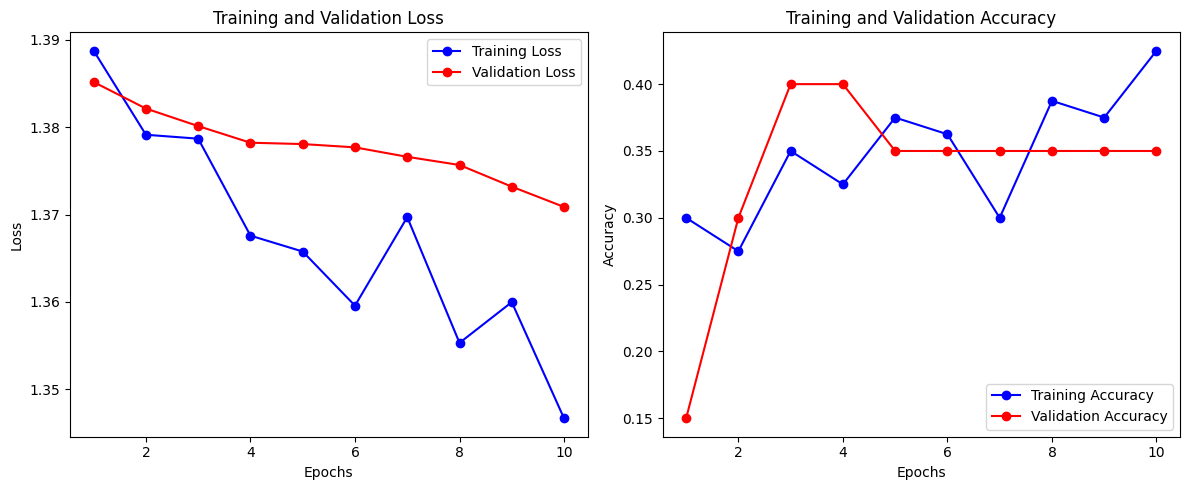

In [ ]:
import matplotlib.pyplot as plt  # Matplotlib 라이브러리의 pyplot 모듈을 임포트하여 그래프를 그릴 수 있도록 함

# 학습 과정에서의 손실과 정확도 추출
loss = history.history['loss']  # 학습 손실 데이터를 history 객체에서 추출
val_loss = history.history['val_loss']  # 검증 손실 데이터를 history 객체에서 추출
accuracy = history.history['accuracy']  # 학습 정확도 데이터를 history 객체에서 추출
val_accuracy = history.history['val_accuracy']  # 검증 정확도 데이터를 history 객체에서 추출

# 에포크 수
epochs = range(1, len(loss) + 1)  # 에포크 수를 1부터 손실 데이터의 길이까지 설정

# 손실 그래프
plt.figure(figsize=(12, 5))  # 그래프의 크기를 설정 (12인치 x 5인치)

plt.subplot(1, 2, 1)  # 1행 2열의 서브플롯에서 첫 번째 서브플롯을 선택
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 학습 손실을 파란색 점선으로 그래프에 그림
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 검증 손실을 빨간색 점선으로 그래프에 그림
plt.title('Training and Validation Loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 그래프에 범례 추가

# 정확도 그래프
plt.subplot(1, 2, 2)  # 1행 2열의 서브플롯에서 두 번째 서브플롯을 선택
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')  # 학습 정확도를 파란색 점선으로 그래프에 그림
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')  # 검증 정확도를 빨간색 점선으로 그래프에 그림
plt.title('Training and Validation Accuracy')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Accuracy')  # y축 레이블 설정
plt.legend()  # 그래프에 범례 추가

# 그래프 표시
plt.tight_layout()  # 서브플롯 간의 간격을 자동으로 조정
plt.show()  # 그래프를 화면에 표시


In [ ]:
# 모델 저장
model.save('my_model.h5')  # HDF5 형식으로 저장
print("모델이 'my_model.h5'로 저장되었습니다.")


모델이 'my_model.h5'로 저장되었습니다.


In [ ]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>